
 SUPPORT VECTOR MACHINE CLASSIFICATION ANALYSIS

Using Breast Cancer Dataset
Dataset shape: (569, 30)
Classes: [0 1] (0: malignant, 1: benign)

TRAINING SVM MODELS 

Training Linear SVM...
Training RBF SVM...
Models trained successfully

MODEL EVALUATION


Linear SVM Results:
------------------------------
Training Accuracy: 0.9912
Testing Accuracy: 0.9737
Cross-validation Score: 0.9670 (+/- 0.0278)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


RBF SVM Results:
------------------------------
Training Accuracy: 0.9824
Testing Accuracy: 0.9825
Cross-validation Score: 0.9714 (+/- 0.0357)

Classification Report:
              precision    recall  f1-score   support

           0       0.9

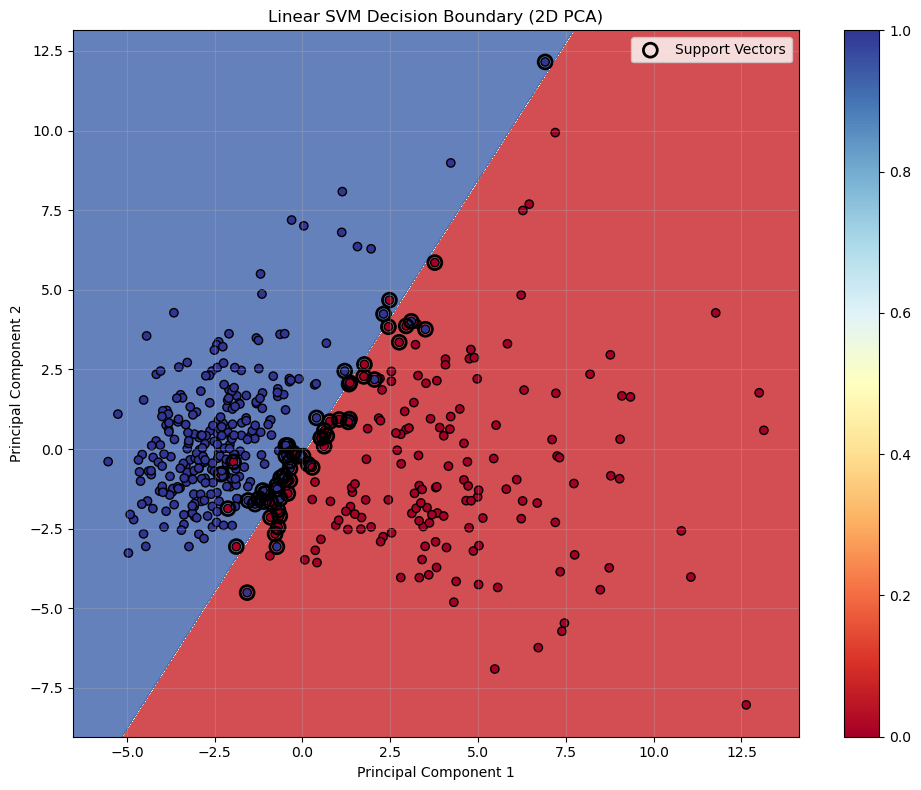

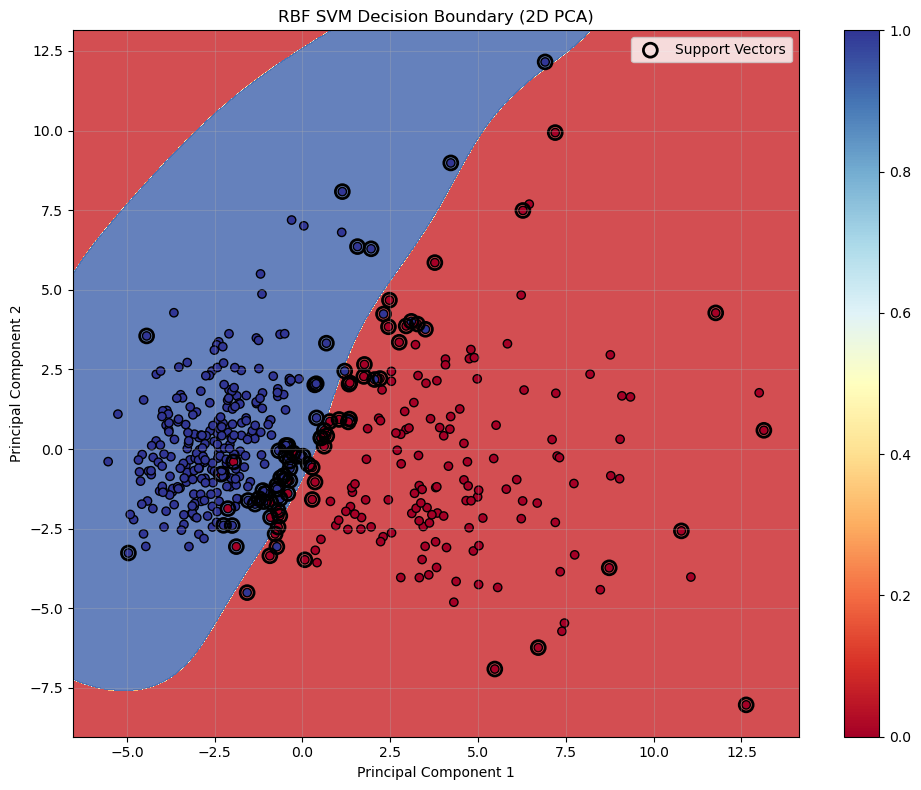

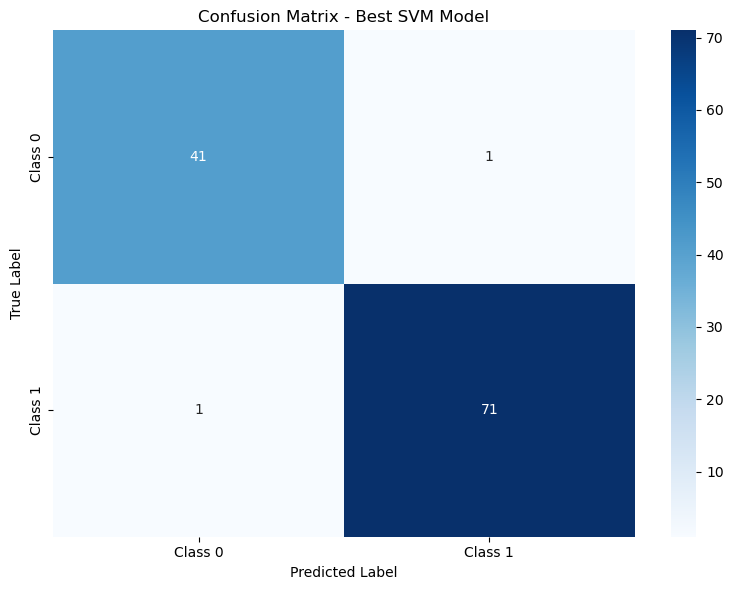


ANALYSIS SUMMARY 

Dataset: Breast Cancer Dataset (569 samples, 30 features)
Best Model: LINEAR SVM
Best Parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best Cross-validation Score: 0.9802
Test Accuracy: 0.9825

FEATURE IMPORTANCE (LINEAR SVM)

Top 10 Most Important Features:
                 feature  importance
21         worst texture    0.453442
10          radius error    0.384574
28        worst symmetry    0.378933
13            area error    0.347304
20          worst radius    0.340441
23            worst area    0.327568
27  worst concave points    0.323480
1           mean texture    0.306913
7    mean concave points    0.295061
22       worst perimeter    0.291193


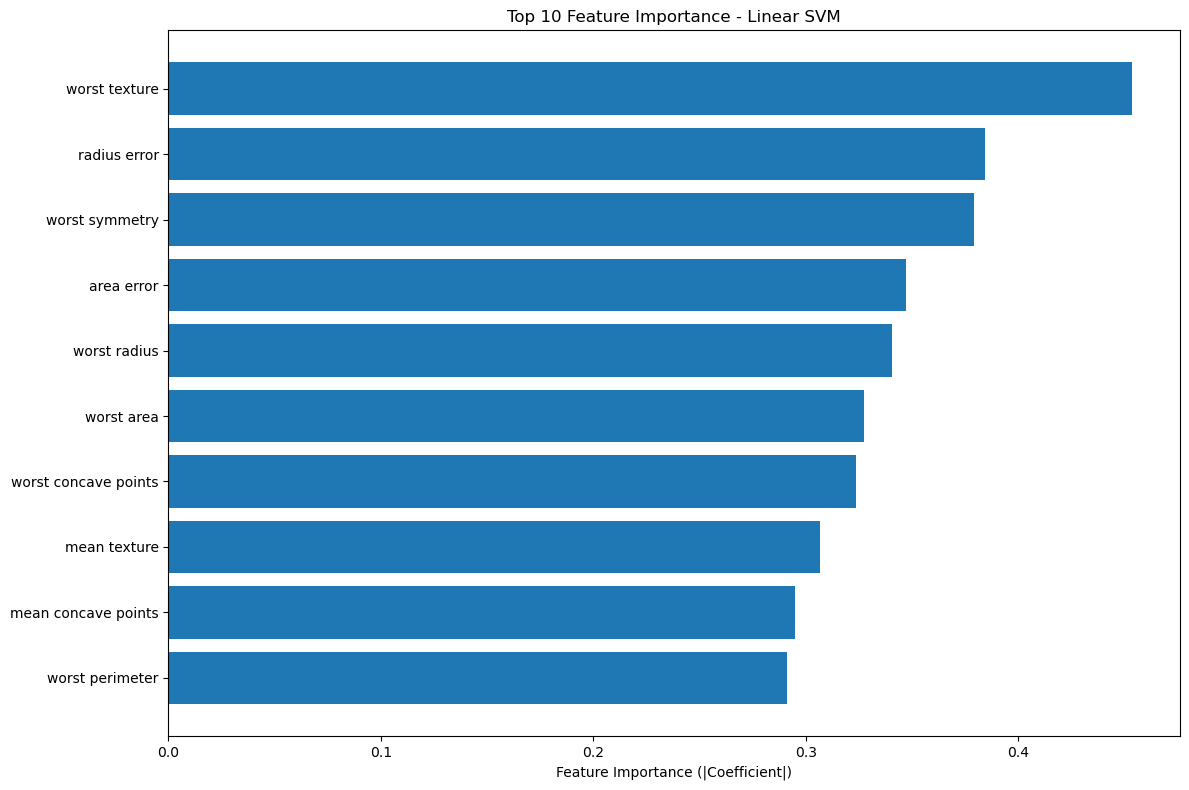

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

class SVMClassifier:
    
    def __init__(self):
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=2)
        self.svm_linear = None
        self.svm_rbf = None
        self.best_svm = None
        
    def load_and_prepare_data(self):
        data = load_breast_cancer()
        X, y = data.data, data.target
        feature_names = data.feature_names
        print("Using Breast Cancer Dataset")
        print(f"Dataset shape: {X.shape}")
        print(f"Classes: {np.unique(y)} (0: malignant, 1: benign)")
        
        return X, y, feature_names
    
    def preprocess_data(self, X_train, X_test):
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled
    
    def train_svm_models(self, X_train, y_train):
        print("\nTRAINING SVM MODELS \n")
        
        
        print("Training Linear SVM...")
        self.svm_linear = SVC(kernel='linear', random_state=42)
        self.svm_linear.fit(X_train, y_train)
        
        print("Training RBF SVM...")
        self.svm_rbf = SVC(kernel='rbf', random_state=42)
        self.svm_rbf.fit(X_train, y_train)
        
        print("Models trained successfully")
    
    def evaluate_models(self, X_train, X_test, y_train, y_test):
        
        print("\nMODEL EVALUATION\n")
        
        
        models = {
            'Linear SVM': self.svm_linear,
            'RBF SVM': self.svm_rbf
        }
        
        results = {}
        
        for name, model in models.items():
            print(f"\n{name} Results:")
            print("-" * 30)
            
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            
            train_acc = accuracy_score(y_train, y_pred_train)
            test_acc = accuracy_score(y_test, y_pred_test)
            
            print(f"Training Accuracy: {train_acc:.4f}")
            print(f"Testing Accuracy: {test_acc:.4f}")
            
            cv_scores = cross_val_score(model, X_train, y_train, cv=5)
            print(f"Cross-validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
            
            results[name] = {
                'train_acc': train_acc,
                'test_acc': test_acc,
                'cv_score': cv_scores.mean(),
                'cv_std': cv_scores.std()
            }
            
            print(f"\nClassification Report:")
            print(classification_report(y_test, y_pred_test))
        
        return results
    
    def hyperparameter_tuning(self, X_train, y_train):
       
        print("\nHYPERPARAMETER TUNING \n")
        
        
        param_grid = [
            {
                'kernel': ['linear'],
                'C': [0.1, 1, 10, 100]
            },
            {
                'kernel': ['rbf'],
                'C': [0.1, 1, 10, 100],
                'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
            }
        ]
        
        print("Performing Grid Search...")
        grid_search = GridSearchCV(
            SVC(random_state=42),
            param_grid,
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )
        
        grid_search.fit(X_train, y_train)
        
        print(f"\nBest Parameters: {grid_search.best_params_}")
        print(f"Best Cross-validation Score: {grid_search.best_score_:.4f}")
        
        self.best_svm = grid_search.best_estimator_
        
        return grid_search
    
    def visualize_decision_boundary(self, X, y, model, title):
        plt.figure(figsize=(10, 8))
        
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
        
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        plt.colorbar(scatter)
        
        if hasattr(model, 'support_vectors_'):
            plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                       s=100, facecolors='none', edgecolors='black', linewidth=2,
                       label='Support Vectors')
            plt.legend()
        
        plt.title(title)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def create_visualizations(self, X_train, X_test, y_train, y_test):
        
        print("\nCREATING VISUALIZATIONS \n")
        
        
        X_train_2d = self.pca.fit_transform(X_train)
        X_test_2d = self.pca.transform(X_test)
        
        svm_linear_2d = SVC(kernel='linear', random_state=42)
        svm_rbf_2d = SVC(kernel='rbf', random_state=42)
        
        svm_linear_2d.fit(X_train_2d, y_train)
        svm_rbf_2d.fit(X_train_2d, y_train)
        
        self.visualize_decision_boundary(
            X_train_2d, y_train, svm_linear_2d, 
            'Linear SVM Decision Boundary (2D PCA)'
        )
        
        self.visualize_decision_boundary(
            X_train_2d, y_train, svm_rbf_2d, 
            'RBF SVM Decision Boundary (2D PCA)'
        )
        
        if self.best_svm:
            y_pred = self.best_svm.predict(X_test)
            
            plt.figure(figsize=(8, 6))
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       xticklabels=['Class 0', 'Class 1'],
                       yticklabels=['Class 0', 'Class 1'])
            plt.title('Confusion Matrix - Best SVM Model')
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
            plt.tight_layout()
            plt.show()
    
    def run_complete_analysis(self):
        
        print("\n SUPPORT VECTOR MACHINE CLASSIFICATION ANALYSIS\n")
        
        
        X, y, feature_names = self.load_and_prepare_data()
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        X_train_scaled, X_test_scaled = self.preprocess_data(X_train, X_test)
        
        self.train_svm_models(X_train_scaled, y_train)
        
        results = self.evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)
        
        grid_search = self.hyperparameter_tuning(X_train_scaled, y_train)
        
        
        print("\nBEST MODEL EVALUATION \n")
       
        
        y_pred_best = self.best_svm.predict(X_test_scaled)
        best_accuracy = accuracy_score(y_test, y_pred_best)
        print(f"Best Model Test Accuracy: {best_accuracy:.4f}")
        
        self.create_visualizations(X_train_scaled, X_test_scaled, y_train, y_test)
        
        
        print("\nANALYSIS SUMMARY \n")
       
        
        print(f"Dataset: Breast Cancer Dataset ({X.shape[0]} samples, {X.shape[1]} features)")
        print(f"Best Model: {self.best_svm.kernel.upper()} SVM")
        print(f"Best Parameters: {self.best_svm.get_params()}")
        print(f"Best Cross-validation Score: {grid_search.best_score_:.4f}")
        print(f"Test Accuracy: {best_accuracy:.4f}")
        
        return results, grid_search

if __name__ == "__main__":
    svm_classifier = SVMClassifier()
    
    results, grid_search = svm_classifier.run_complete_analysis()
    
    if svm_classifier.best_svm.kernel == 'linear':
        
        print("\nFEATURE IMPORTANCE (LINEAR SVM)\n")
        
        
        feature_importance = np.abs(svm_classifier.best_svm.coef_[0])
        
        data = load_breast_cancer()
        feature_names = data.feature_names
        
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False)
        
        print("Top 10 Most Important Features:")
        print(importance_df.head(10))
        
        plt.figure(figsize=(12, 8))
        plt.barh(range(10), importance_df.head(10)['importance'])
        plt.yticks(range(10), importance_df.head(10)['feature'])
        plt.xlabel('Feature Importance (|Coefficient|)')
        plt.title('Top 10 Feature Importance - Linear SVM')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()